In [108]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import xgboost as xgb
from sklearn.tree import export_graphviz
import pydotplus
import subprocess
import seaborn.apionly as sns
from sklearn.preprocessing import Imputer

In [109]:
data=pd.read_csv('./winequality-red.csv')

In [110]:
data['quality'].nunique()

6

In [111]:
data = data.dropna()

In [112]:
after_rows = data.shape[0]
print(after_rows)

1599


In [113]:
# create the y set which will be quality. this will be a multiclassificaiton model
y=data[['quality']].copy()

In [114]:
boxplotxx=y['quality'].value_counts()
print(boxplotxx)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [115]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


(2, 9)

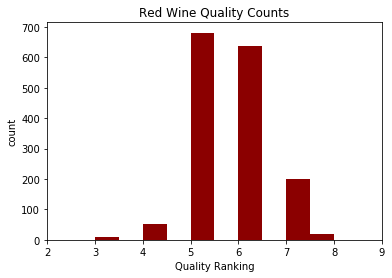

In [116]:

plt.hist(y['quality'],color= 'darkred')
plt.title('Red Wine Quality Counts')
plt.xlabel('Quality Ranking')
plt.ylabel('count')
plt.xlim(2,9)
 




In [117]:
#create the "X" independent variable set

X= data.iloc[:,0:11]

In [118]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [119]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [121]:
quality_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
quality_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [122]:
predictions = quality_classifier.predict(X_test)

In [123]:
predictions[:10]

array([5, 6, 6, 6, 6, 5, 5, 5, 5, 6], dtype=int64)

In [124]:
y_test[:10]

,quality
660,6
1351,6
230,7
1111,7
444,7
1392,5
1558,5
789,5
1222,6
726,6


In [125]:
accuracy_score(y_test, predictions)

0.5511363636363636

In [201]:
from pandas import DataFrame as df
df = pd.DataFrame() 



In [128]:

dot_data = StringIO()
export_graphviz(quality_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
                                                   "free sulfur dioxide", "total sulfur dioxide", "density", "pH",
                                                   "sulphates", "alcohol"],
               class_names=["rank3","rank4","rank5","rank6","rank7","rank8"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [129]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\Micha\Anaconda3\\Library\\bin\\graphviz'

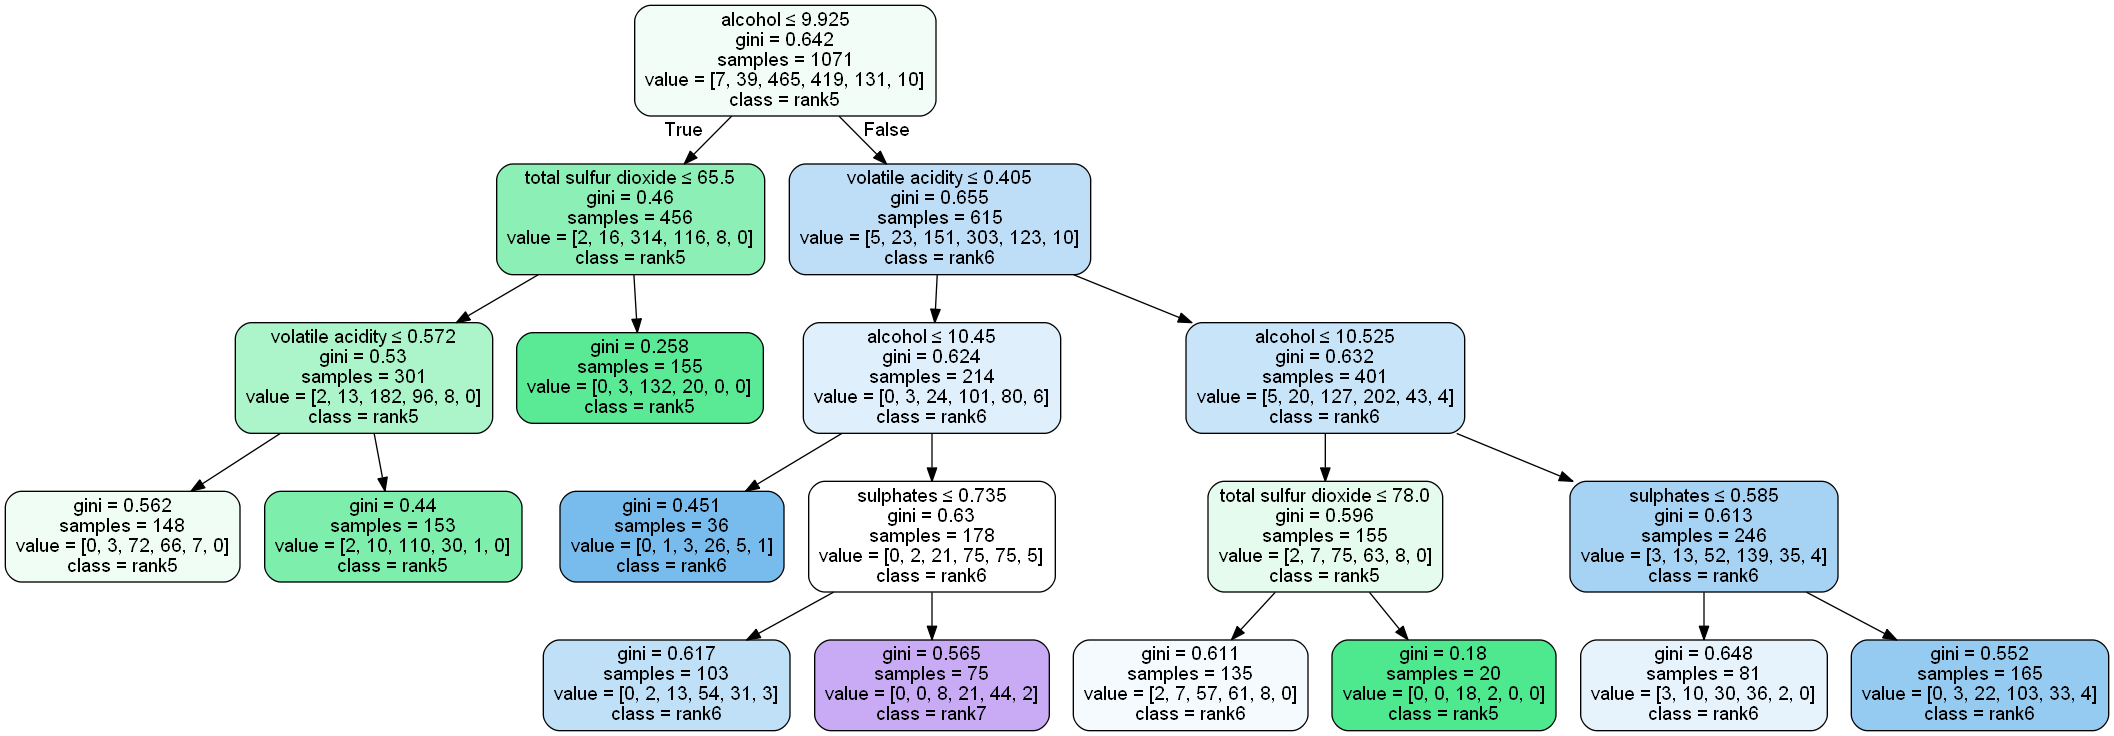

In [130]:
Image(graph.create_png())

In [131]:
from sklearn.metrics import classification_report, confusion_matrix 

In [132]:
print(confusion_matrix(y_test, predictions))  

[[  0   0   3   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 142  73   1   0]
 [  0   0  77 127  15   0]
 [  0   0   3  43  22   0]
 [  0   0   1   5   2   0]]


In [133]:
print(classification_report(y_test, predictions))  

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00        14
          5       0.60      0.66      0.63       216
          6       0.50      0.58      0.54       219
          7       0.55      0.32      0.41        68
          8       0.00      0.00      0.00         8

avg / total       0.53      0.55      0.53       528



C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
